In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('fake-news/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


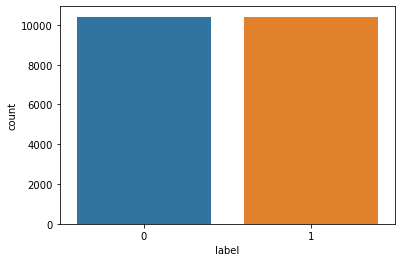

In [7]:
sns.countplot(df['label'])

In [8]:
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [9]:
X = df.drop('label', axis = 1)

In [10]:
y = df['label']

In [11]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [13]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [16]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [17]:
df.reset_index(inplace=True)

In [18]:
df.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [22]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = cv.fit_transform(corpus).toarray()
y = df['label']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =0)

In [29]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [30]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [36]:
count_df = pd.DataFrame(X_train, columns= cv.get_feature_names())
count_df

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

Accuracy:  0.9010207801676996
Confusion matrix, without normalization


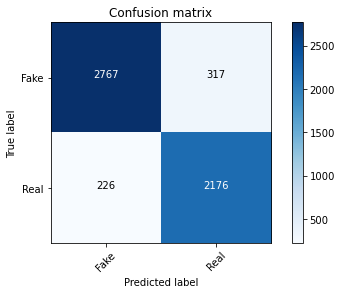

In [44]:
y_pred = nb.predict(X_test)
acs = accuracy_score(y_test, y_pred)
print('Accuracy: ',acs)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ["Fake", "Real"])

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(n_iter_no_change = 50)

0.9170616113744076
Confusion matrix, without normalization


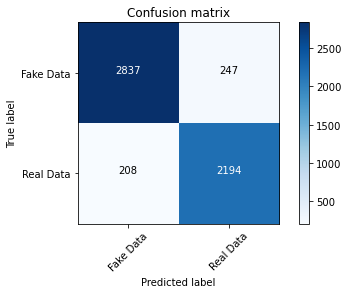

In [48]:
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)
acs2 = accuracy_score(y_test, y_pred)
print(acs2)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ["Fake Data", "Real Data"])

In [52]:
prev_score = 0
for alpha in np.arange(0, 1, 0.1):
    sub_nb  = MultinomialNB(alpha=alpha)
    sub_nb.fit(X_train, y_train)
    y_pred = sub_nb.predict(X_test)
    acs3 = accuracy_score(y_test, y_pred)
    if acs3>prev_score:
        nb = sub_nb
    print("Alpha: {}, Score : {}".format(alpha,acs3))

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8909952606635071
Alpha: 0.1, Score : 0.9026613197229311
Alpha: 0.2, Score : 0.9026613197229311
Alpha: 0.30000000000000004, Score : 0.9017499088589136
Alpha: 0.4, Score : 0.9012030623405031
Alpha: 0.5, Score : 0.9017499088589136
Alpha: 0.6000000000000001, Score : 0.9019321910317171
Alpha: 0.7000000000000001, Score : 0.9021144732045207
Alpha: 0.8, Score : 0.9019321910317171
Alpha: 0.9, Score : 0.9021144732045207


In [53]:
#Real
sorted(zip(nb.coef_[0], cv.get_feature_names()), reverse=True)[:20]

[(-3.992374490701134, 'trump'),
 (-4.284063471495295, 'hillari'),
 (-4.375580567930435, 'clinton'),
 (-4.887684815606532, 'elect'),
 (-5.144915434795778, 'new'),
 (-5.2395113154287705, 'comment'),
 (-5.273142059454619, 'video'),
 (-5.400645119011008, 'war'),
 (-5.400645119011008, 'us'),
 (-5.400645119011008, 'hillari clinton'),
 (-5.435233547184826, 'fbi'),
 (-5.450431408094257, 'vote'),
 (-5.535634592088265, 'email'),
 (-5.592825704366866, 'world'),
 (-5.628779247294968, 'obama'),
 (-5.7180673279362, 'donald'),
 (-5.751991883718116, 'donald trump'),
 (-5.765890648108931, 'russia'),
 (-5.86899882309961, 'day'),
 (-5.86899882309961, 'america')]

In [54]:
#Fake
sorted(zip(nb.coef_[0], cv.get_feature_names()))[:20]

[(-10.833396248702579, 'abe'),
 (-10.833396248702579, 'abroad'),
 (-10.833396248702579, 'abus new'),
 (-10.833396248702579, 'abus new york'),
 (-10.833396248702579, 'act new'),
 (-10.833396248702579, 'act new york'),
 (-10.833396248702579, 'advic'),
 (-10.833396248702579, 'advis new'),
 (-10.833396248702579, 'advis new york'),
 (-10.833396248702579, 'afford care'),
 (-10.833396248702579, 'afford care act'),
 (-10.833396248702579, 'age new'),
 (-10.833396248702579, 'age new york'),
 (-10.833396248702579, 'agenda breitbart'),
 (-10.833396248702579, 'ail'),
 (-10.833396248702579, 'airbag'),
 (-10.833396248702579, 'aleppo new'),
 (-10.833396248702579, 'aleppo new york'),
 (-10.833396248702579, 'ali'),
 (-10.833396248702579, 'america breitbart')]